## scratchpad / working notebook

In [1]:
from imports import *

import acquire
import warnings
warnings.filterwarnings('ignore')

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
df = acquire.get_data()

Reading from local CSV...


In [3]:
def prep_data(df):
    
    # rename columns: lower case, remove space
    for col in df.columns:
        df = df.rename(columns={col: col.lower().replace(' ', '_')})
        
    # cast date columns as datetime type
    df.order_date = pd.to_datetime(df.order_date)
    df.ship_date = pd.to_datetime(df.ship_date)
        
    # make datetime index
    df.index = df.order_date
    
    # add profit per product column
    df['profit_per_product'] = df.profit / df.quantity
    
    # add sales per product
    df['sales_per_product'] = df.sales / df.quantity
    
    return df

In [4]:
def split_data(df):
    '''
    Splits data into train and test based on year.
    '''
    train = df['2014':'2016']
    test = df['2017']
    return train, test

In [5]:
df = prep_data(df)

In [6]:
train, test = split_data(df)

In [7]:
furniture = train[train.category == 'Furniture']
technology = train[train.category == 'Technology']
office = train[train.category == 'Office Supplies']

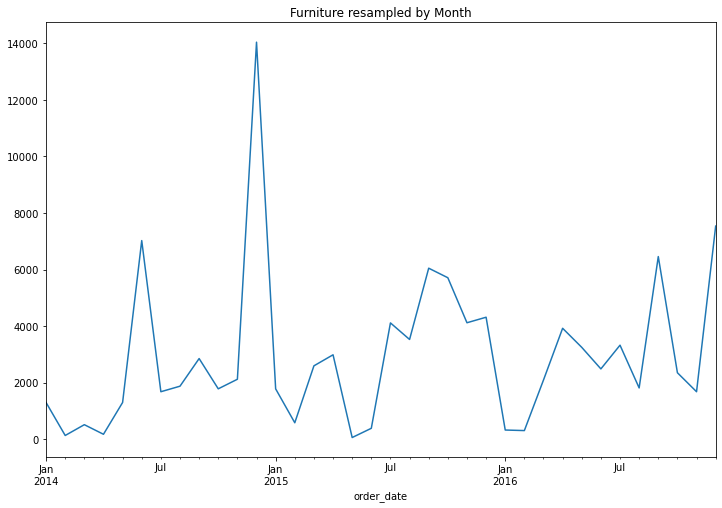

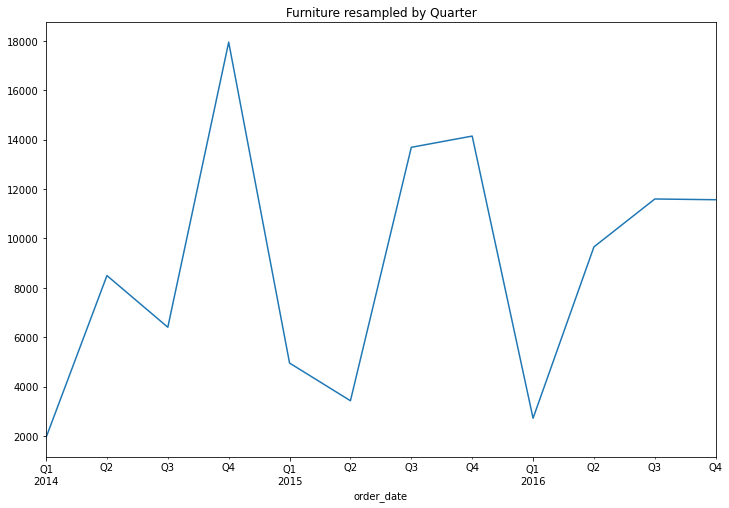

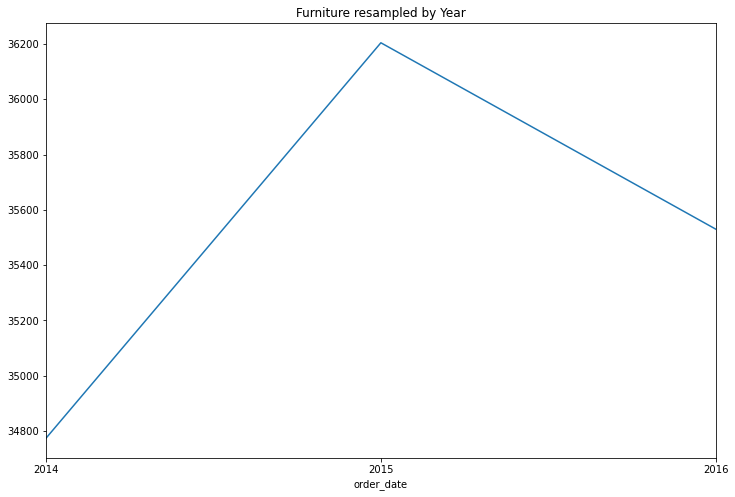

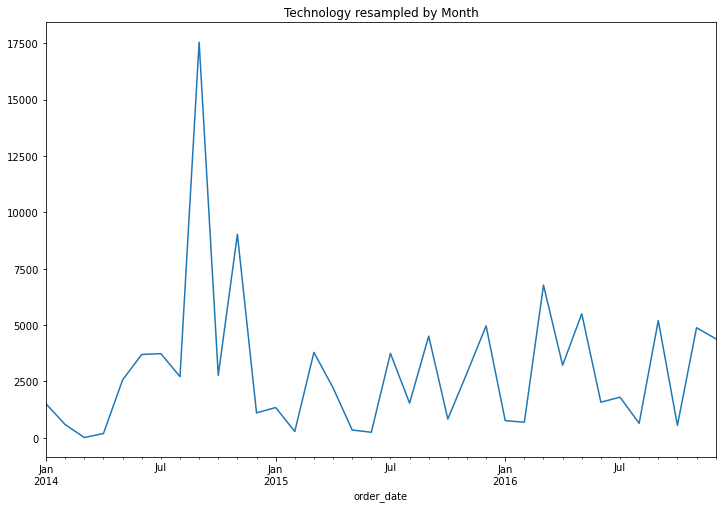

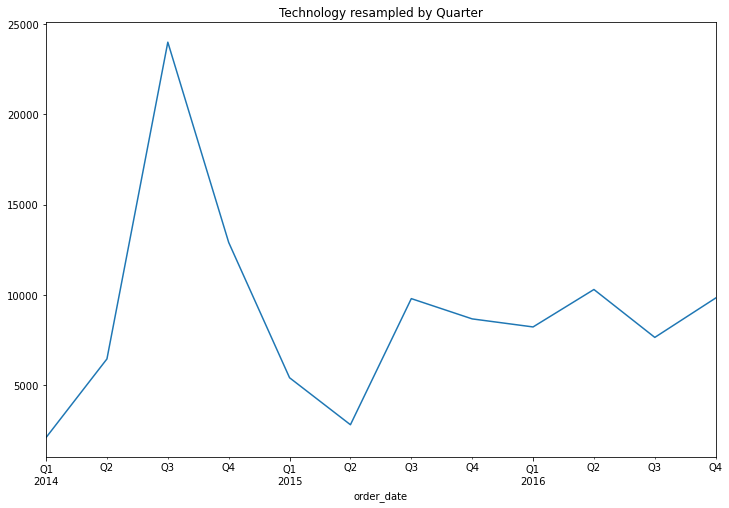

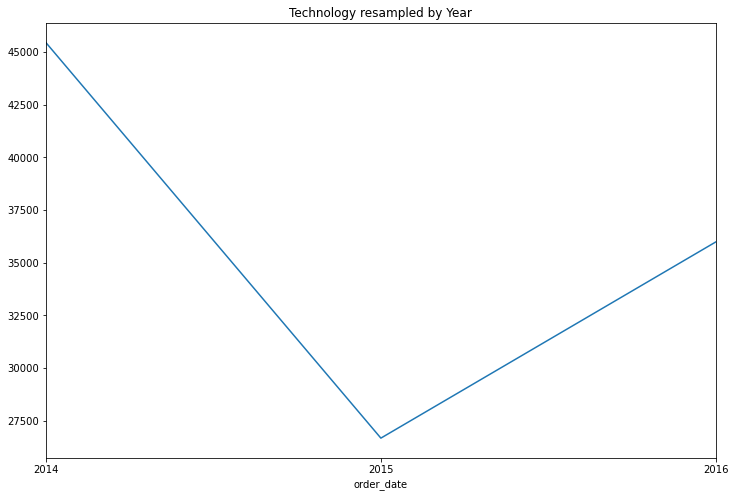

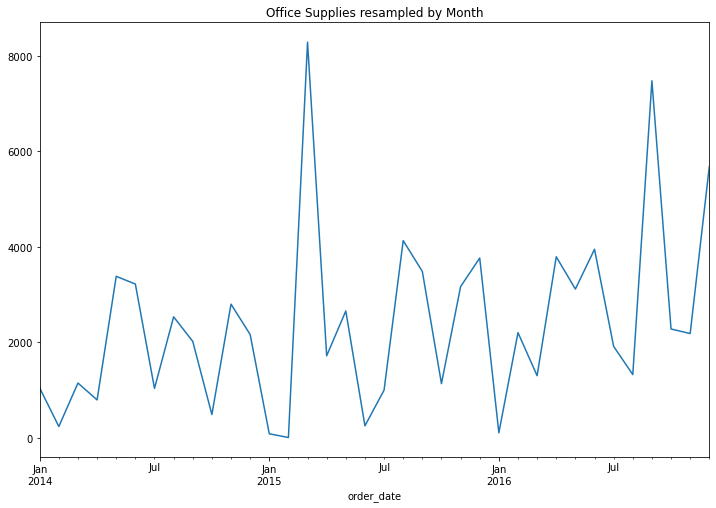

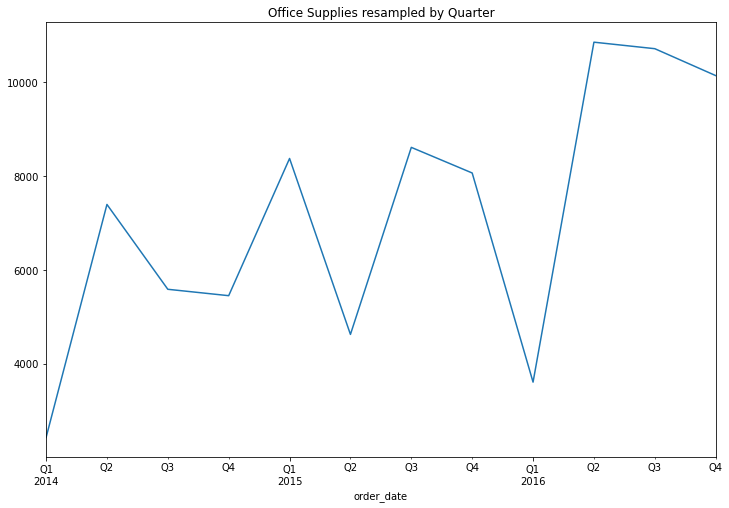

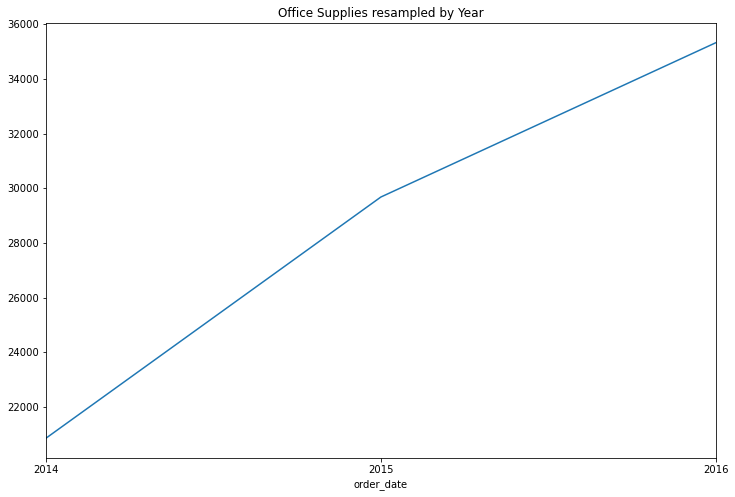

In [8]:
categories = [furniture, technology, office]
category_names = ['Furniture', 'Technology', 'Office Supplies']

periods = ['M', 'Q', 'Y']
period_names = ['Month', 'Quarter', 'Year']

for cat, cat_name in zip(categories, category_names):
    for per, per_name in zip(periods, period_names):
        plt.figure(figsize=(12,8))
        cat['sales'].resample(per).sum().plot()
        plt.title(f'{cat_name} resampled by {per_name}')

In [9]:
df = prep_data(df)

In [10]:
df.category.unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [11]:
df.order_date.min(), df.order_date.max()

(Timestamp('2014-01-04 00:00:00'), Timestamp('2017-12-30 00:00:00'))

#### Which category has the highest profit_per_product?

#### Which products have the most/least sales volume in the last year?

In [12]:
products_2017 = df['2017'].groupby(by='product_id').sum()[['sales', 'profit', 'quantity']]
products_2017['profit_per_product'] = products_2017.profit / products_2017.quantity
products_2017.sort_values(by='quantity', ascending=False)

,sales,profit,quantity,profit_per_product
product_id,,,,
OFF-AP-10002684,1799.384,267.4760,18.0,14.859778
OFF-AR-10003514,65.272,19.9398,17.0,1.172929
OFF-BI-10001036,56.668,-16.4520,16.0,-1.028250
FUR-FU-10001290,673.600,215.5520,16.0,13.472000
OFF-PA-10002377,137.376,50.9480,14.0,3.639143
...,...,...,...,...
OFF-ST-10003722,14.030,4.0687,1.0,4.068700
OFF-EN-10002504,21.744,7.3386,1.0,7.338600
OFF-AR-10000390,3.304,1.0738,1.0,1.073800


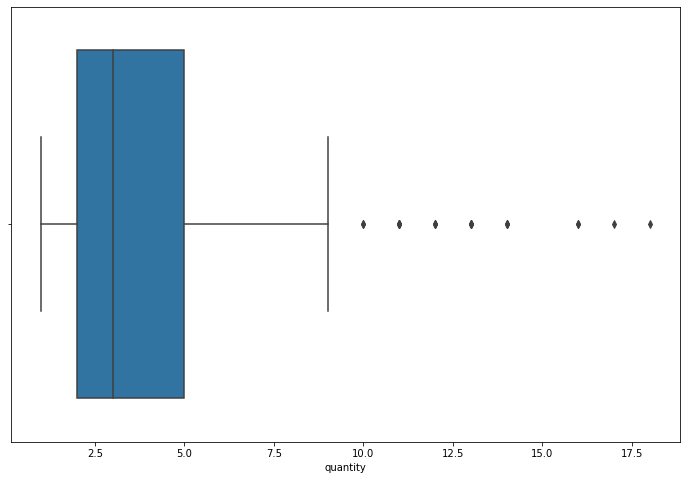

In [13]:
plt.figure(figsize=(12, 8))
sns.boxplot(products_2017.quantity)
plt.show()

In [14]:
low_vol_prods = products_2017[products_2017.quantity <= 5]
low_vol_prods

,sales,profit,quantity,profit_per_product
product_id,,,,
FUR-BO-10001337,514.1650,-30.2450,5.0,-6.0490
FUR-BO-10001619,84.9800,18.6956,1.0,18.6956
FUR-BO-10002206,119.8330,-12.6882,1.0,-12.6882
FUR-BO-10002545,782.9400,203.5644,3.0,67.8548
FUR-BO-10002824,205.3328,-36.2352,2.0,-18.1176
...,...,...,...,...
TEC-PH-10004536,323.9760,20.2485,3.0,6.7495
TEC-PH-10004586,863.8800,107.9850,3.0,35.9950
TEC-PH-10004614,207.0000,51.7500,3.0,17.2500


In [15]:
low_vol_prods[low_vol_prods.profit_per_product == low_vol_prods.profit_per_product.max()]

,sales,profit,quantity,profit_per_product
product_id,,,,
TEC-MA-10000822,3059.982,679.996,2.0,339.998


### Which category has highest profit per product?

In [16]:
# average sales_per_product by category
train.groupby('category').mean()[['profit_per_product']]

,profit_per_product
category,
Furniture,1.668842
Office Supplies,4.773817
Technology,20.180264


### Which category has lowest sales volume per product?

In [17]:
# total volume of sales by category
train.groupby('category').sum()[['quantity']]

,quantity
category,
Furniture,1018.0
Office Supplies,2855.0
Technology,891.0


# Creating hypothetical sales data for 2017 
### based on a recommended expansion of the technology product line
#### i.e.: what happens if we double our technology sales?

#### What happens if we double technology sales and limit discounts to 35%

In [50]:
hypo_tech_sales_17 = test[test.category == 'Technology']
hypo_tech_sales_17 = hypo_tech_sales_17[hypo_tech_sales_17.discount <= .35]

In [51]:
hypothetical_17 = pd.concat([test, hypo_tech_sales_17])

In [30]:
len(hypothetical_17)

571

In [31]:
len(tech_sales_17)

87

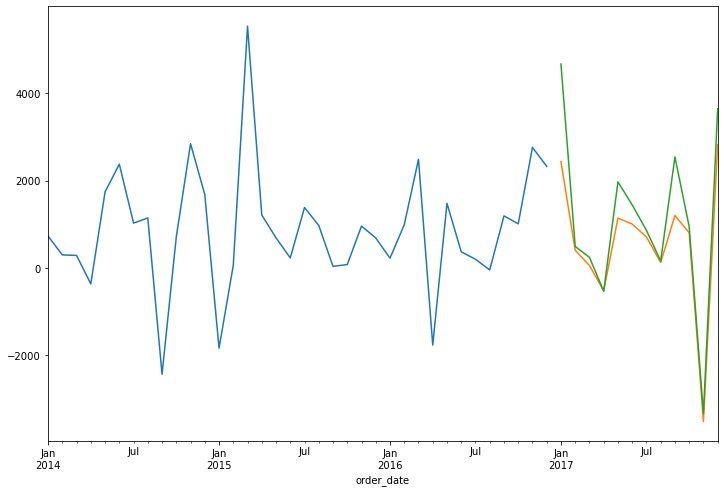

In [54]:
plt.figure(figsize=(12,8))
train['profit'].resample('M').sum().plot()
test['profit'].resample('M').sum().plot()
hypothetical_17['profit'].resample('M').sum().plot()
plt.show()